# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Riza Anwar Fadil
- **Email:** rizaaf124@gmail.com
- **ID Dicoding:** mc222d5y1739

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rata-rata kosentrasi PM2.5 setiap tahunya?
- Pada jam berapa polusi udara cenderung mencapai puncaknya dan kapan terendah?
- Bagaimana pengaruh suhu terhadap konsentrasi CO, curah hujan terhadap PM2.5, kecepatan angin terhadap NO2, dan titik embun terhadap O3?
- Bagaimana korelasi antara hujan dan gas CO?





## Import Semua Packages/Library yang Digunakan

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


## Data Wrangling

### Gathering Data

In [114]:
Dingling_df = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [115]:
Dongsi_df = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [116]:
Guanyuan_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
Guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [117]:
Gucheng_df = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [118]:
Huairou_df = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
Huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [119]:
Nongzhanguan_df = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [120]:
Shunyi_df = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
Shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [121]:
Tiantan_df = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
Tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [122]:
Wanliu_df = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [123]:
Wanshouxigong_df = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
Wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [124]:
Changping_df = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [125]:
Aotizhongxin_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Aotizhongxin_df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**

1. Polusi Udara (Partikulat & Gas)
- PM2.5: Partikulat halus yang dapat masuk ke paru-paru dan aliran darah.
- PM10: Partikulat lebih besar yang dapat mempengaruhi saluran pernapasan.
- SO2: Gas yang dihasilkan dari pembakaran bahan bakar fosil dan dapat menyebabkan iritasi pernapasan.
- NO2: Gas yang berasal dari emisi kendaraan dan industri, dapat menyebabkan gangguan pernapasan.
- CO: Gas beracun tanpa warna dan bau yang dapat mengganggu suplai oksigen dalam tubuh.
- O3: Gas di lapisan troposfer yang dapat menyebabkan iritasi mata dan saluran pernapasan.
2. Parameter Meteorologi (Cuaca)
- Suhu (TEMP): Menggambarkan tingkat panas atau dinginnya udara.
- Tekanan Udara (PRES): Mengukur berat atmosfer di suatu lokasi.
- Titik Embun (DEWP): Suhu di mana udara mulai mengembun menjadi air.
- Curah Hujan (RAIN): Jumlah air hujan yang turun dalam periode tertentu.
- Arah Angin (wd): Menunjukkan dari mana angin bertiup berdasarkan derajat.
- Kecepatan Angin (WSPM): Mengukur seberapa cepat angin bergerak.

### Assessing Data

In [126]:
dfs = {
    "Guanyuan": Guanyuan_df,
    "Gucheng": Gucheng_df,
    "Huairou": Huairou_df,
    "Nongzhanguan": Nongzhanguan_df,
    "Shunyi": Shunyi_df,
    "Tiantan": Tiantan_df,
    "Wanliu": Wanliu_df,
    "Wanshouxigong": Wanshouxigong_df,
    "Aotizhongxin": Aotizhongxin_df,
    "Changping": Changping_df,
    "Dingling": Dingling_df,
    "Dongsi": Dongsi_df
}

def analyze_stations(dfs):
    for station, df in dfs.items():
        print(f"\n==== MEMPROSES STASIUN: {station} ====")

        print("\n-- INFO DATA --")
        print(df.info())

        print("\n-- CEK NILAI NULL --")
        print(df.isnull().sum())

        print("\n-- CEK DATA DUPLIKASI --")
        print(f"Jumlah duplikasi: {df.duplicated().sum()}")

        print("\n-- DESKRIPSI DATA --")
        print(f"{df.describe()}")

analyze_stations(dfs)


==== MEMPROSES STASIUN: Guanyuan ====

-- INFO DATA --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

-- CEK

**Insight:**
- Tidak terdapat Duplikasi pada semua dataset
- Type variabel untuk semua kolom sudah benar
- Terdapat banyak missing value pada setiap dataset yaitu pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, Rain, wd, dan WPSM.

### Cleaning Data

In [127]:
def handle_missing_values(df, station_name):
    print(f"\n==== Memproses Stasiun: {station_name} ====")

    pollutant_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
    for col in pollutant_cols:
        df[col] = df.groupby(["hour"])[col].transform(lambda x: x.fillna(x.median()))

    weather_cols = ["TEMP", "PRES", "DEWP", "RAIN"]
    df[weather_cols] = df[weather_cols].interpolate(method='linear')

    df["wd"] = df["wd"].fillna(df["wd"].mode()[0])

    df["WSPM"] = df["WSPM"].fillna(df["WSPM"].median())

    print("Missing values berhasil ditangani!")
    return df

Guanyuan_df = handle_missing_values(Guanyuan_df, "Guanyuan")
Gucheng_df = handle_missing_values(Gucheng_df, "Gucheng")
Huairou_df = handle_missing_values(Huairou_df, "Huairou")
Nongzhanguan_df = handle_missing_values(Nongzhanguan_df, "Nongzhanguan")
Shunyi_df = handle_missing_values(Shunyi_df, "Shunyi")
Tiantan_df = handle_missing_values(Tiantan_df, "Tiantan")
Wanliu_df = handle_missing_values(Wanliu_df, "Wanliu")
Wanshouxigong_df = handle_missing_values(Wanshouxigong_df, "Wanshouxigong")
Aotizhongxin_df = handle_missing_values(Aotizhongxin_df, "Aotizhongxin")
Changping_df = handle_missing_values(Changping_df, "Changping")
Dingling_df = handle_missing_values(Dingling_df, "Dingling")
Dongsi_df = handle_missing_values(Dongsi_df, "Dongsi")



==== Memproses Stasiun: Guanyuan ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Gucheng ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Huairou ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Nongzhanguan ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Shunyi ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Tiantan ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Wanliu ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Wanshouxigong ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Aotizhongxin ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Changping ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Dingling ====
Missing values berhasil ditangani!

==== Memproses Stasiun: Dongsi ====
Missing values berhasil ditangani!


**Insight:**
- Polutan Udara (PM2.5, PM10, SO2, NO2, CO, O3):
Pengisian menggunakan nilai median. Nilai yang hilang diisi dengan nilai median dari kolom yang sama, dikelompokkan berdasarkan jam (hour). Ini berarti, untuk setiap jam tertentu, nilai yang hilang akan diganti dengan median nilai polutan pada jam tersebut. Tujuannya adalah untuk mempertahankan pola harian dari polutan udara, karena konsentrasi polutan seringkali bervariasi sepanjang hari.

- Variabel Cuaca (TEMP, PRES, DEWP, RAIN):
Interpolasi linear time series. Nilai yang hilang diisi dengan menggunakan interpolasi linear. Ini berarti, nilai yang hilang diestimasi berdasarkan nilai-nilai yang ada sebelum dan sesudahnya dalam urutan waktu. Interpolasi linear cocok untuk data time series seperti data cuaca, karena mengasumsikan perubahan nilai yang bertahap dan kontinu.

- Arah Angin (wd):
Pengisian dengan nilai modus (nilai yang paling sering muncul). Nilai yang hilang diisi dengan nilai modus dari kolom arah angin. Ini berarti, nilai yang paling sering muncul dalam kolom tersebut akan digunakan untuk mengisi nilai yang hilang. Penggunaan modus tepat untuk data kategorikal, seperti arah angin.

- Kecepatan Angin (WSPM):
Pengisian dengan nilai median. Nilai yang hilang diisi dengan nilai median dari kolom kecepatan angin. Penggunaan median tepat untuk data numerik, dan lebih robust terhadap outlier dibandingkan mean.

## Exploratory Data Analysis (EDA)

### Explore ...

Pada bagian ini semua data dari setiap station akan disatukan menjadi satu.penggabungan data menjadi satu dataset adalah langkah penting. Ini memungkinkan analisis yang lebih komprehensif dan perbandingan antar stasiun.

In [128]:
df = pd.concat([Guanyuan_df, Gucheng_df, Huairou_df, Nongzhanguan_df, Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df, Aotizhongxin_df, Changping_df, Dingling_df, Dongsi_df], ignore_index=True)


In [129]:
print("Ukuran dataset setelah digabung:", df.shape)

Ukuran dataset setelah digabung: (420768, 18)


In [130]:
print("\nMissing Values setelah Penggabungan:\n", df.isnull().sum())



Missing Values setelah Penggabungan:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**

-Pada bagian ini semua data dari setiap station akan disatukan menjadi satu .
penggabungan data menjadi satu dataset adalah langkah penting. Ini memungkinkan analisis yang lebih komprehensif dan perbandingan antar stasiun.

### Korelasi Antar Polutan

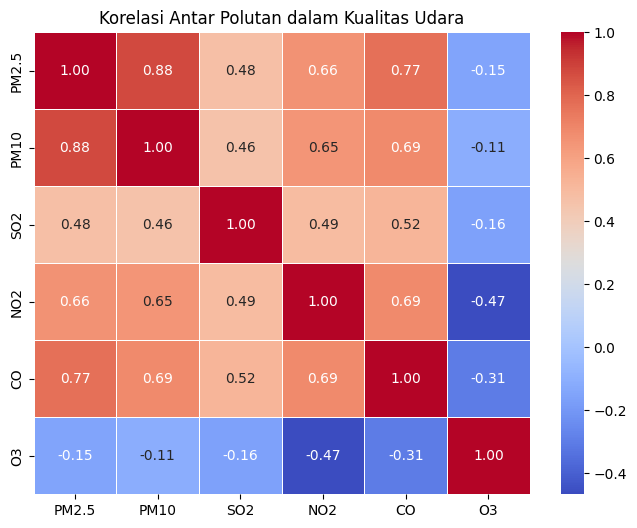

In [131]:
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

corr_matrix = df[pollutants].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Polutan dalam Kualitas Udara")
plt.show()

**Insight:**

-Hubungan Erat Antar Partikulat (PM2.5 dan PM10) → r = 0.88
PM2.5 dan PM10 memiliki korelasi yang sangat tinggi, menunjukkan bahwa peningkatan salah satu jenis partikulat cenderung diikuti oleh peningkatan lainnya.

-Korelasi Sedang Antara PM2.5, NO2, dan CO → r berkisar 0.66 - 0.77
PM2.5 & NO2 (r = 0.66) → Menunjukkan bahwa konsentrasi partikel halus sering kali berkaitan dengan peningkatan gas NO2 (biasanya dari emisi kendaraan dan pembakaran bahan bakar).

-PM2.5 & CO (r = 0.77) → Menunjukkan bahwa partikel polusi sering berasosiasi dengan karbon monoksida, yang juga berasal dari sumber pembakaran.
Korelasi Rendah-Negatif Ozon (O3) terhadap Polutan Lain
Ozon memiliki korelasi negatif dengan PM2.5 (-0.15), PM10 (-0.11), SO2 (-0.16), NO2 (-0.47), dan CO (-0.31).

-Ini menunjukkan bahwa ketika polutan utama meningkat, kadar ozon cenderung menurun, kemungkinan karena reaksi kimia di atmosfer (misalnya, NO2 dapat bereaksi dengan sinar matahari untuk membentuk O3).

### Perbandingan Curah Hujan dan Polutan

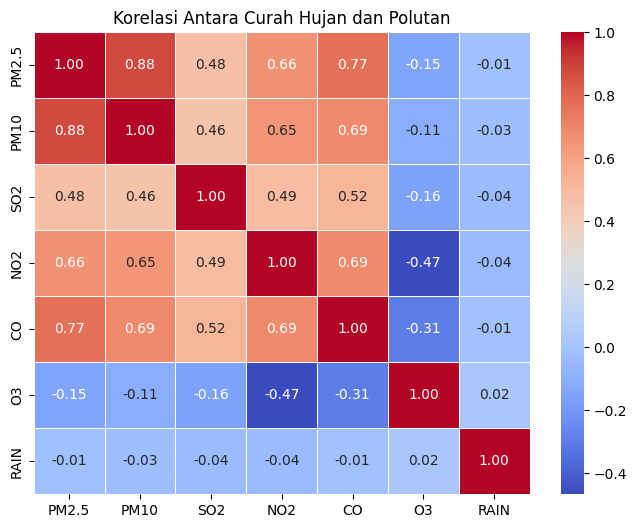

In [132]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN"]
df_corr = df[pollutants].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antara Curah Hujan dan Polutan")
plt.show()


**Insight:**

-Curah hujan (RAIN) memiliki korelasi yang sangat lemah dengan PM2.5 dan polutan lainnya (nilai korelasi mendekati nol atau negatif kecil).
Artinya, curah hujan tidak memiliki hubungan yang signifikan terhadap kadar polutan secara statistik.
Scatter Plot PM2.5 vs. Curah Hujan:

In [133]:
import pandas as pd

# Menghitung jumlah hari hujan per stasiun
rainy_days = df[df['RAIN'] > 0].groupby('station')['RAIN'].count().reset_index()
rainy_days.columns = ['station', 'rainy_days']

# Menghitung rata-rata suhu per stasiun
avg_temp = df.groupby('station')['TEMP'].mean().reset_index()
avg_temp.columns = ['station', 'avg_temp']

# Menghitung rata-rata konsentrasi CO per stasiun
avg_co = df.groupby('station')['CO'].mean().reset_index()
avg_co.columns = ['station', 'avg_co']

# Menghitung rata-rata konsentrasi PM2.5 per stasiun
avg_pm25 = df.groupby('station')['PM2.5'].mean().reset_index()
avg_pm25.columns = ['station', 'avg_pm25']

# Menggabungkan semua hasil
merged_df = rainy_days.merge(avg_temp, on='station')\
                      .merge(avg_co, on='station')\
                      .merge(avg_pm25, on='station')

# Sorting berdasarkan masing-masing kategori
sorted_rainy = merged_df.sort_values(by='rainy_days', ascending=False)
sorted_temp = merged_df.sort_values(by='avg_temp', ascending=False)
sorted_co = merged_df.sort_values(by='avg_co', ascending=False)
sorted_pm25 = merged_df.sort_values(by='avg_pm25', ascending=False)


print("Top 5 Stasiun dengan Hari Hujan Terbanyak")
print(tabulate(sorted_rainy.head(5), headers='keys', tablefmt='grid'))

print("\nTop 5 Stasiun dengan Suhu Rata-rata Tertinggi")
print(tabulate(sorted_temp.head(5), headers='keys', tablefmt='grid'))

print("\nTop 5 Stasiun dengan Konsentrasi CO Tertinggi")
print(tabulate(sorted_co.head(5), headers='keys', tablefmt='grid'))

print("\nTop 5 Stasiun dengan Konsentrasi PM2.5 Tertinggi")
print(tabulate(sorted_pm25.head(5), headers='keys', tablefmt='grid'))


Top 5 Stasiun dengan Hari Hujan Terbanyak
+----+--------------+--------------+------------+----------+------------+
|    | station      |   rainy_days |   avg_temp |   avg_co |   avg_pm25 |
+====+==============+==============+============+==========+============+
|  6 | Huairou      |         1493 |    12.4306 |  1011.61 |    68.9656 |
+----+--------------+--------------+------------+----------+------------+
| 10 | Wanliu       |         1436 |    13.4258 |  1297.51 |    83.0862 |
+----+--------------+--------------+------------+----------+------------+
|  0 | Aotizhongxin |         1380 |    13.5814 |  1241.75 |    82.0988 |
+----+--------------+--------------+------------+----------+------------+
|  4 | Guanyuan     |         1380 |    13.5814 |  1253.04 |    82.4854 |
+----+--------------+--------------+------------+----------+------------+
|  9 | Tiantan      |         1371 |    13.6682 |  1286.65 |    81.6749 |
+----+--------------+--------------+------------+----------+----------

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren rata-rata kosentrasi konsentrasi polusi setiap tahunya?

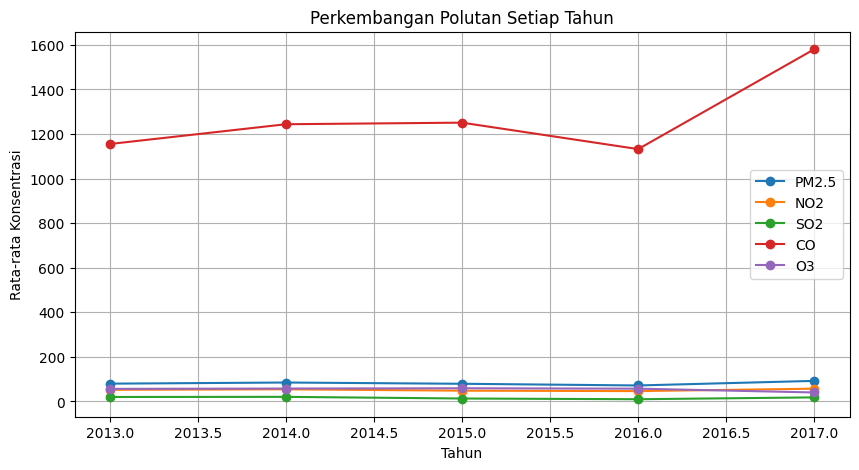

In [134]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

pollutants = ['PM2.5', 'NO2', 'SO2', 'CO', 'O3']  

pollutants_yearly = df.groupby('year')[pollutants].mean()


plt.figure(figsize=(10, 5))

for pollutant in pollutants:
    plt.plot(pollutants_yearly.index, pollutants_yearly[pollutant], marker='o', linestyle='-', label=pollutant)

plt.xlabel('Tahun')
plt.ylabel('Rata-rata Konsentrasi')
plt.title('Perkembangan Polutan Setiap Tahun')

plt.legend() 
plt.grid(True)
plt.show()


**Insight:**
- Polutan CO jauh lebih tinggi dibandingkan polutan lain

- Konsentrasi CO memiliki nilai yang sangat besar dibandingkan dengan PM2.5, NO2, SO2, dan O3.
Ini bisa menunjukkan bahwa sumber emisi CO dominan di lokasi pengukuran, mungkin berasal dari kendaraan bermotor atau aktivitas industri.

- Tren kenaikan CO yang signifikan di tahun 2017
Konsentrasi CO naik tajam di tahun 2017 dibandingkan tahun-tahun sebelumnya.
Bisa jadi ada peningkatan aktivitas industri atau transportasi yang menyebabkan lonjakan ini.
PM2.5 dan polutan lainnya relatif stabil

- Ini bisa berarti bahwa polusi udara lebih banyak dipengaruhi oleh partikulat halus (PM2.5) dibandingkan dengan gas pencemar seperti NO2 dan SO2.

### Pertanyaan 2: Pada jam berapa polusi udara cenderung mencapai puncaknya dan kapan terendah?


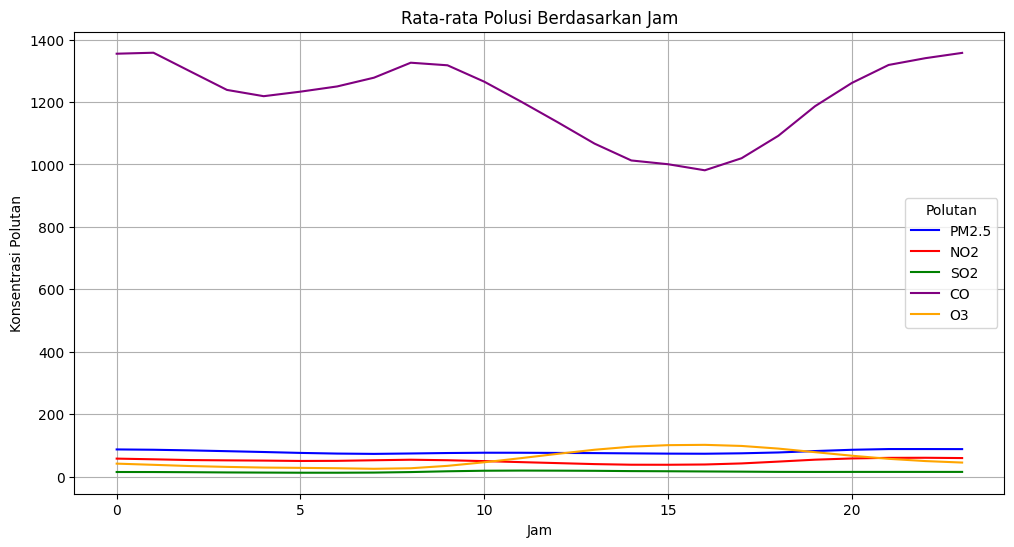

In [135]:
plt.figure(figsize=(12, 6))

pollutants = ["PM2.5", "NO2", "SO2", "CO", "O3"]
colors = ["b", "r", "g", "purple", "orange"]

for pol, col in zip(pollutants, colors):
    sns.lineplot(x="hour", y=pol, data=df, estimator="mean", errorbar=None, label=pol, color=col)

plt.title("Rata-rata Polusi Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Konsentrasi Polutan")
plt.legend(title="Polutan")
plt.grid()
plt.show()


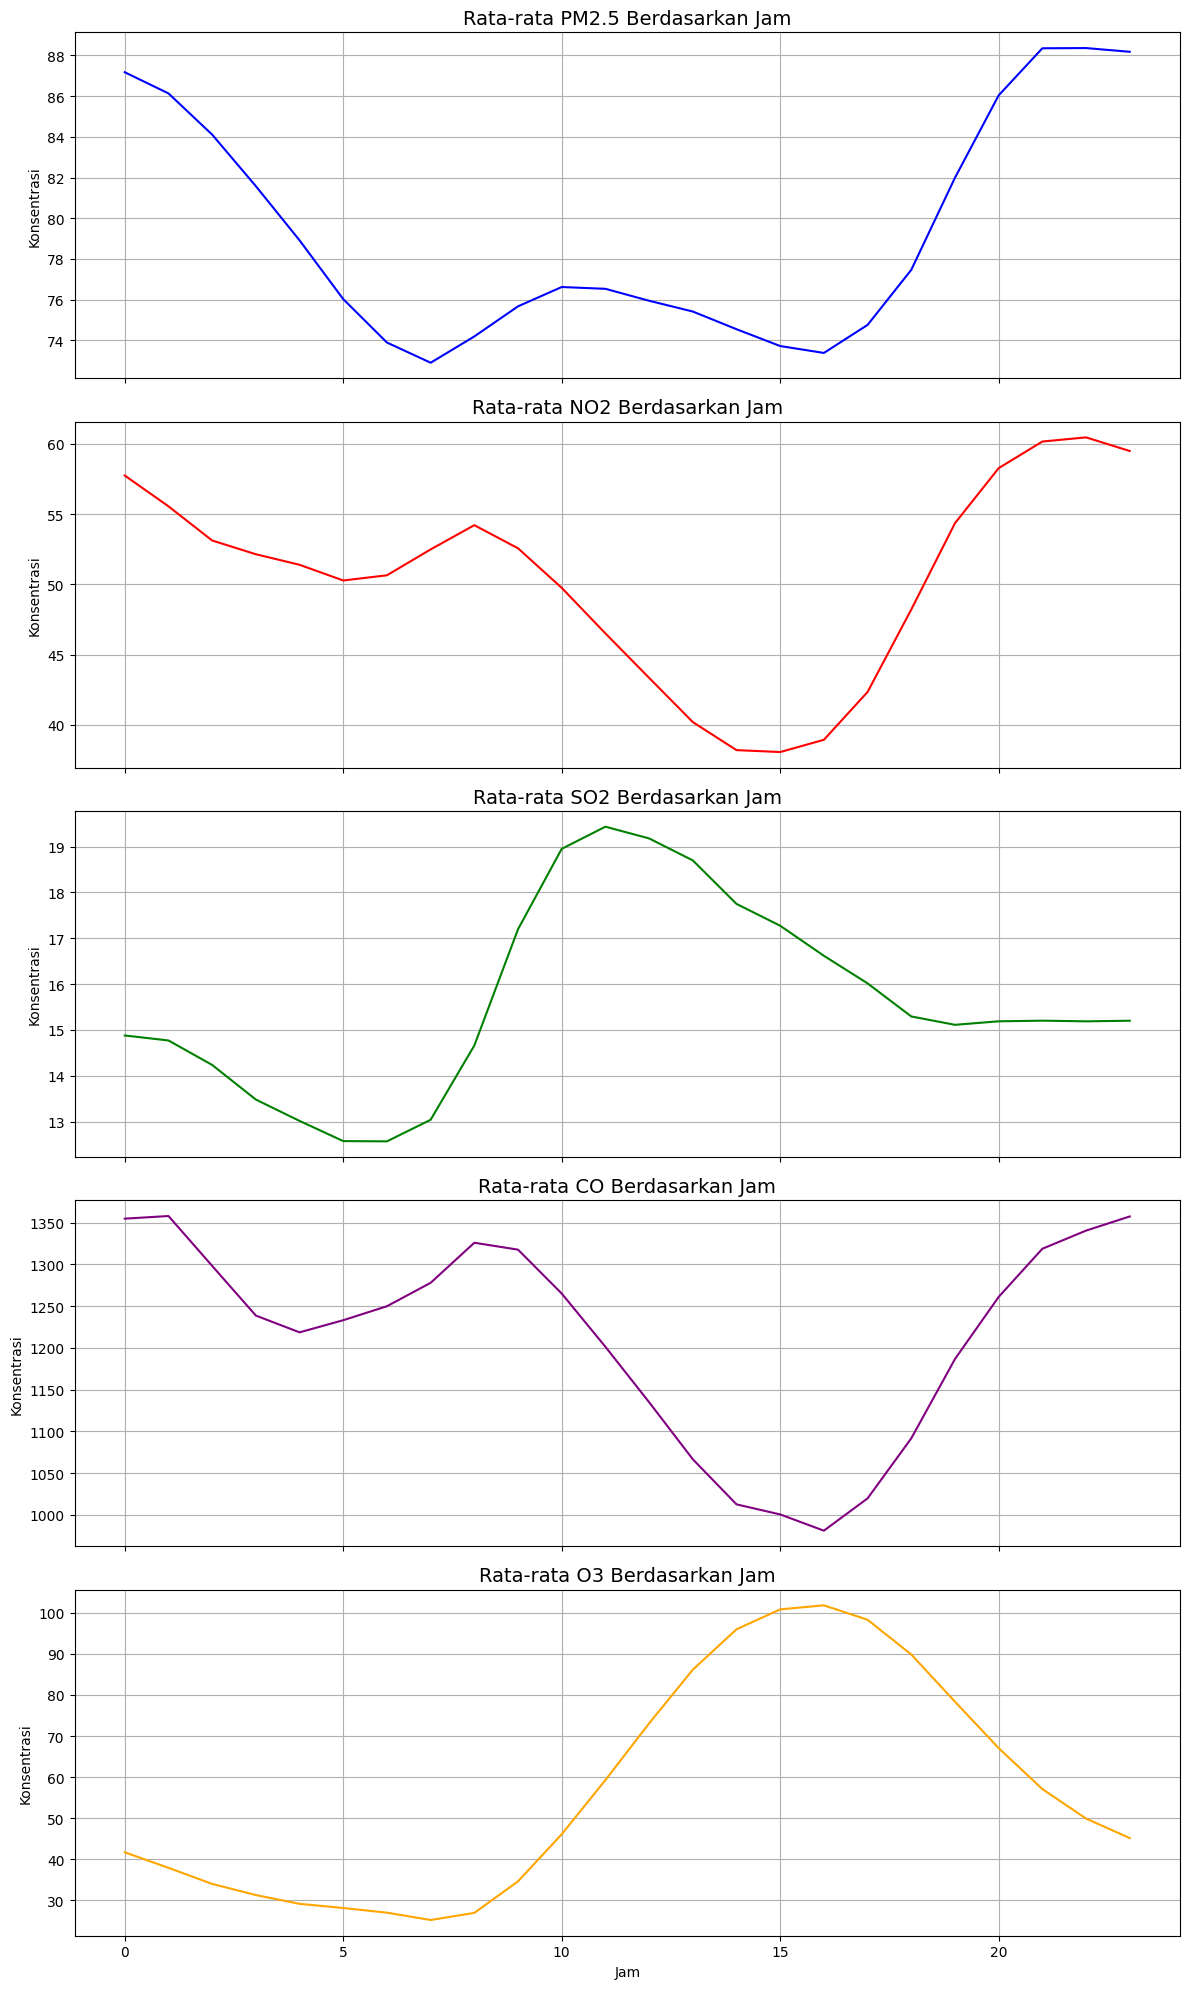

In [136]:
pollutants = ["PM2.5", "NO2", "SO2", "CO", "O3"]
colors = ["b", "r", "g", "purple", "orange"]

fig, axes = plt.subplots(len(pollutants), 1, figsize=(12, 20), sharex=True)  # Subplot per polutan

for ax, pol, col in zip(axes, pollutants, colors):
    sns.lineplot(x="hour", y=pol, data=df, estimator="mean", errorbar=None, color=col, ax=ax)
    ax.set_title(f"Rata-rata {pol} Berdasarkan Jam", fontsize=14)
    ax.set_ylabel("Konsentrasi")
    ax.grid()

axes[-1].set_xlabel("Jam")  # Label x-axis hanya di subplot terakhir

plt.tight_layout()
plt.show()


**Insight:**
- CO mendominasi polusi udara dalam dataset ini.
- Polusi dari PM2.5, NO2, CO cenderung tinggi di pagi dan malam hari.
- Ozon meningkat pada siang hari karena paparan sinar matahari.

### Pertanyaan 3: Bagaimana pengaruh suhu terhadap konsentrasi CO, curah hujan terhadap PM2.5, kecepatan angin terhadap NO2, dan titik embun terhadap O3?


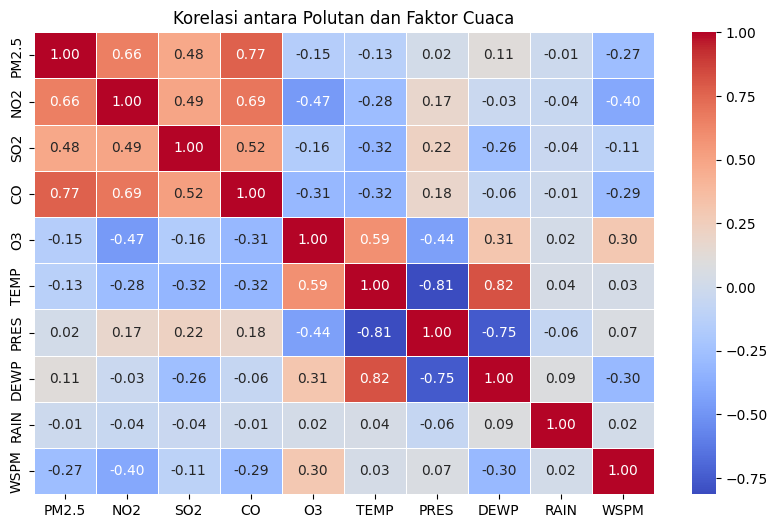

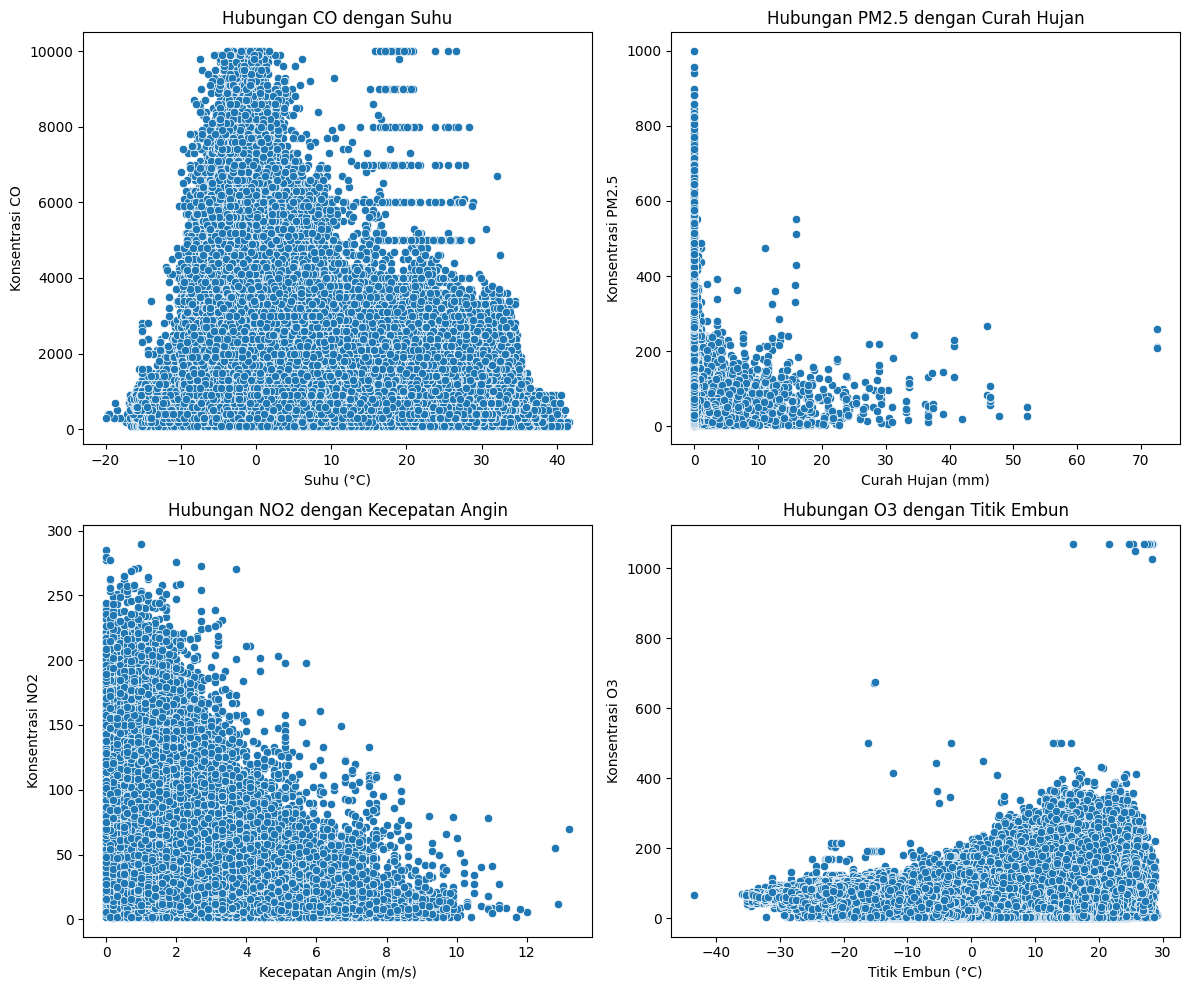

In [137]:
cols_of_interest = ['PM2.5', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df_selected = df[cols_of_interest]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Polutan dan Faktor Cuaca")
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=df, x='TEMP', y='CO', ax=axes[0,0])
axes[0,0].set_title('Hubungan CO dengan Suhu')
axes[0,0].set_xlabel('Suhu (°C)')
axes[0,0].set_ylabel('Konsentrasi CO')

sns.scatterplot(data=df, x='RAIN', y='PM2.5', ax=axes[0,1])
axes[0,1].set_title('Hubungan PM2.5 dengan Curah Hujan')
axes[0,1].set_xlabel('Curah Hujan (mm)')
axes[0,1].set_ylabel('Konsentrasi PM2.5')

sns.scatterplot(data=df, x='WSPM', y='NO2', ax=axes[1,0])
axes[1,0].set_title('Hubungan NO2 dengan Kecepatan Angin')
axes[1,0].set_xlabel('Kecepatan Angin (m/s)')
axes[1,0].set_ylabel('Konsentrasi NO2')

sns.scatterplot(data=df, x='DEWP', y='O3', ax=axes[1,1])
axes[1,1].set_title('Hubungan O3 dengan Titik Embun')
axes[1,1].set_xlabel('Titik Embun (°C)')
axes[1,1].set_ylabel('Konsentrasi O3')

plt.tight_layout()
plt.show()


**Insight:**
- Curah hujan sedikit menurunkan PM2.5, tetapi efeknya tidak terlalu kuat.
- Angin lebih cepat mengurangi NO2, menunjukkan bahwa polusi berkurang saat angin bertiup kencang.
- CO lebih tinggi saat suhu rendah, mungkin akibat aktivitas pemanas dan industri.
- Ozon meningkat saat titik embun tinggi, sejalan dengan kondisi yang mendukung reaksi fotokimia.

### Pertanyaan 4: Bagaimana korelasi antara hujan dan gas CO?

Stasiun dengan curah hujan tertinggi: Wanliu (0.07 mm)
Stasiun dengan CO tertinggi: Wanshouxigong (1356.41 ppm)


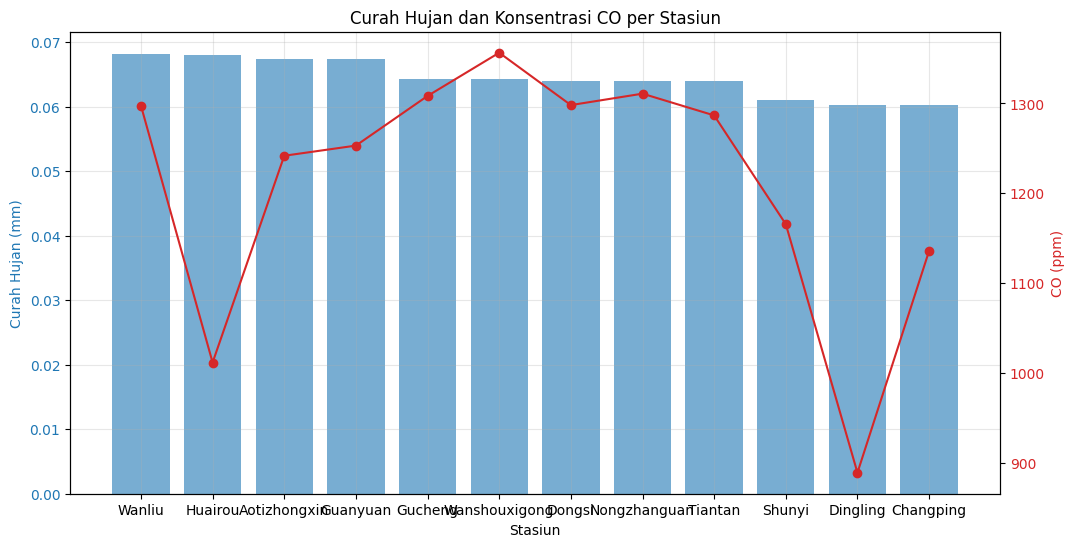

In [138]:
df_station = df.groupby('station')[['RAIN', 'CO']].mean()

top_RAIN_station = df_station['RAIN'].idxmax()
top_RAIN_value = df_station['RAIN'].max()

top_co_station = df_station['CO'].idxmax()
top_co_value = df_station['CO'].max()


print(f"Stasiun dengan curah hujan tertinggi: {top_RAIN_station} ({top_RAIN_value:.2f} mm)")
print(f"Stasiun dengan CO tertinggi: {top_co_station} ({top_co_value:.2f} ppm)")


df_station.sort_values('RAIN', ascending=False, inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Stasiun')
ax1.set_ylabel('Curah Hujan (mm)', color=color)
ax1.bar(df_station.index, df_station['RAIN'], color=color, alpha=0.6, label='Curah Hujan')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('CO (ppm)', color=color)
ax2.plot(df_station.index, df_station['CO'], color=color, marker='o', linestyle='-', label='CO')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Curah Hujan dan Konsentrasi CO per Stasiun')
ax1.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Dingling memiliki CO terendah dan curah hujan terendah, yang mungkin menunjukkan bahwa hujan dapat berperan dalam menurunkan polusi CO.
- Stasiun dengan curah hujan tinggi tidak selalu memiliki CO rendah, misalnya Wanliu memiliki curah hujan tinggi tetapi tetap memiliki CO cukup tinggi.
- Ada indikasi bahwa beberapa daerah dengan curah hujan tinggi memiliki CO yang lebih rendah, tetapi tidak selalu berlaku untuk semua stasiun.

## Conclusion

- Pertanyaan 1

CO merupakan polutan dominan dan meningkat signifikan pada tahun 2017.


- Pertanyaan 2

Polusi udara lebih tinggi pada pagi dan malam hari, sementara ozon meningkat di siang hari karena proses fotokimia.


- Pertanyaan 3

Cuaca mempengaruhi kualitas udara, tetapi dengan dampak yang berbeda pada tiap polutan.


- Pertanyaan 4

Curah hujan tidak selalu menurunkan CO, menunjukkan bahwa faktor lain juga berperan dalam distribusi polutan.

### Eksport new file

In [139]:
df.to_csv("all_data.csv", index=False)